In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cbook as cbook
from mpl_toolkits.basemap import Basemap
from ast import literal_eval
from scipy.misc import imread
pd.options.mode.chained_assignment = None

In [2]:
raleigh = pd.read_csv('Data/raleigh.csv')
sanfrancisco = pd.read_csv('Data/sanfrancisco.csv')
map_raleigh = pd.read_csv('Data/raleigh_final.csv')
map_sanfrancisco = pd.read_csv('Data/sanfrancisco_final.csv')
map_raleigh_final = map_raleigh[pd.notnull(map_raleigh['LOCATION'])]
map_raleigh_final['LOCATION'] = map_raleigh_final['LOCATION'].apply(literal_eval)
map_sanfrancisco['Location'] = map_sanfrancisco['Location'].apply(literal_eval)

All crime data was accessed from [Open Data Census](http://us-city.census.okfn.org/dataset/crime-stats) on 02/24/2016. This data is used to compare the crime rates and types between San Francisco, CA and Raleigh, NC. This data is helpful for traveling, looking for housing and jobs, and many other applications.

Raleigh's categories:

* LCF - Code for Type of Crime [Unused]
* LCR DESC - Type of Crime [Used]
* INC DATETIME - Month/Day/Year and Time of Crime [Used]
* INC NO - Unique Identifier for the Incident [Unused]
* LOCATION - (Latitude, Longitude) [Used]
* DISTRICT - Less Accurate Location [Unused]

San Francisco's categories:

* IncidntNum - Unique Identifier for the Incident [Unused]
* Category - Type of Crime [Used]
* Descript - More Detailed Description of Crime [Unused]
* DayOfWeek - Day of the Week (Sunday-Saturday) [Unused]
* Date - Month/Day/Year of the Crime [Used]
* Time - Hour : Minute of the Crime [Unused]
* PdDistrict - Name of District of the Crime [Unused]
* Resolution - Current Case Status [Unused]
* Address - Postal Address [Unused]
* X - Longitude [Used]
* Y - Latitude [Used]
* Location - (Latitude, Longitude) [Unused]

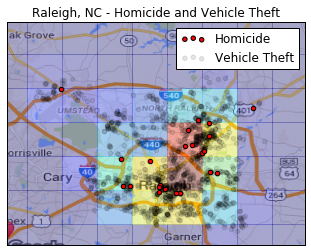

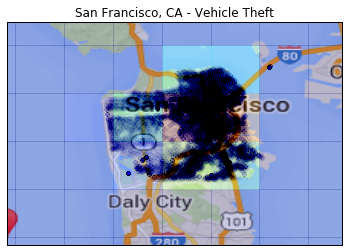

In [3]:
x = []
y = []
x_gta = []
y_gta = []
x_homicide = []
y_homicide = []
z = map_raleigh_final['LCR DESC'] == 'Motor Vehicle Theft'
for a in map_raleigh_final['LOCATION'].loc[z]:
    x.append(a[0])
    y.append(a[1])
for a in map_raleigh_final['LOCATION'].loc[z]: #vehicle theft
    x_gta.append(a[0])
    y_gta.append(a[1])
z = map_raleigh_final['LCR DESC'] != 'Motor Vehicle Theft'
for a in map_raleigh_final['LOCATION'].loc[z]: #homicide
    x_homicide.append(a[0])
    y_homicide.append(a[1])

map_raleigh = Basemap(lon_0=-78.65, lat_0=35.85,
    llcrnrlat=35.7, llcrnrlon=-78.85,
    urcrnrlat=36., urcrnrlon=-78.45)
yy,xx = map_raleigh(x,y)
db = 1 # bin padding
lon_bins = np.linspace(min(xx)-db, max(xx)+db)
lat_bins = np.linspace(min(yy)-db, max(yy)+db)
density, _, _ = np.histogram2d(yy, xx, [lat_bins, lon_bins])
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)
xs, ys = map_raleigh(lon_bins_2d, lat_bins_2d) # will be plotted using pcolormesh
plt.pcolormesh(xs, ys, density, alpha=0.3)
datafile = cbook.get_sample_data('/home/david/Downloads/share/hw3/data/raleigh2.jpg')
img = imread(datafile)
yy_homicide,xx_homicide = map_raleigh(x_homicide,y_homicide)
hom = map_raleigh.scatter(xx_homicide, yy_homicide, zorder=2, alpha=1, c='red')
yy_gta,xx_gta = map_raleigh(x_gta,y_gta)
gta = map_raleigh.scatter(xx_gta, yy_gta, zorder=1, alpha=0.1, c='black')
plt.legend((hom, gta), ('Homicide', 'Vehicle Theft'), loc='upper right')
map_raleigh.imshow(img, zorder=0)
plt.title('Raleigh, NC - Homicide and Vehicle Theft')
plt.show()

map_sanfrancisco = map_sanfrancisco[(map_sanfrancisco.X < -120) & (map_sanfrancisco.X > -125) & (map_sanfrancisco.Y < 40) & (map_sanfrancisco.Y > 35)]
x = map_sanfrancisco['X'].tolist()
y = map_sanfrancisco['Y'].tolist()

sanfran_map = Basemap(lon_0=-122.45, lat_0=37.75,
                      llcrnrlat=37.65, llcrnrlon=-122.6,
                      urcrnrlat=37.85, urcrnrlon=-122.3)
xx,yy = sanfran_map(x,y)
db = 1 # bin padding
lon_bins = np.linspace(min(xx)-db, max(xx)+db)
lat_bins = np.linspace(min(yy)-db, max(yy)+db)
density, _, _ = np.histogram2d(yy, xx, [lat_bins, lon_bins])
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)
# convert the bin mesh to map coordinates:
xs, ys = sanfran_map(lon_bins_2d, lat_bins_2d) # will be plotted using pcolormesh
plt.pcolormesh(xs, ys, density, alpha=0.2)
datafile = cbook.get_sample_data('/home/david/Downloads/share/hw3/data/sanfrancisco2.jpg')
img = imread(datafile)
sanfran_map.scatter(xx, yy, zorder=1, alpha=0.002)
sanfran_map.imshow(img, zorder=0)
plt.title('San Francisco, CA - Vehicle Theft')
plt.show()

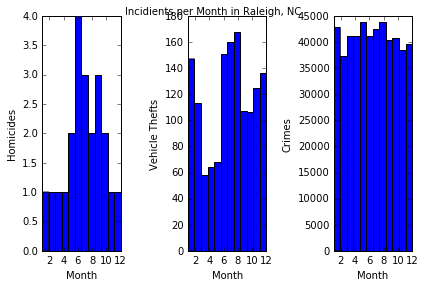

In [4]:
plt.figure(1)
plt.subplot(131)
a = pd.DatetimeIndex(map_raleigh_final['INC DATETIME'].loc[z])
plt.hist(a.month, bins=12)
plt.xlim(1,12)
#plt.title('Homicides Per Month in Raleigh, NC')
plt.xlabel('Month')
plt.ylabel('Homicides')

plt.subplot(132)
z = map_raleigh_final['LCR DESC'] == 'Motor Vehicle Theft'
a = pd.DatetimeIndex(map_raleigh_final['INC DATETIME'].loc[z])
plt.hist(a.month, bins=12)
plt.xlim(1,12)
#plt.title('Vehicle Thefts Per Month in Raleigh, NC')
plt.xlabel('Month')
plt.ylabel('Vehicle Thefts')

plt.subplot(133)
a = pd.DatetimeIndex(raleigh['INC DATETIME'])
plt.hist(a.month, bins=12)
plt.xlim(1,12)
#plt.title('Crimes Per Month in Raleigh, NC')
plt.xlabel('Month')
plt.ylabel('Crimes')
plt.suptitle('Incidients per Month in Raleigh, NC')
plt.tight_layout()
plt.show()

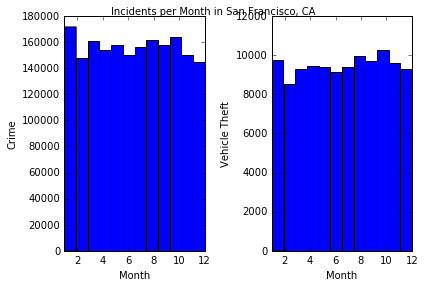

In [5]:
plt.figure(1)
plt.subplot(121)
a = pd.DatetimeIndex(sanfrancisco['Date'])
plt.hist(a.month, bins=12)
plt.xlim(1,12)
#plt.title('Crimes Per Month in San Francisco, CA')
plt.xlabel('Month')
plt.ylabel('Crime')

plt.subplot(122)
a = pd.DatetimeIndex(map_sanfrancisco['Date'])
plt.hist(a.month, bins=12)
plt.xlim(1,12)
#plt.title('Vehicle Thefts Per Month in San Francisco, CA')
plt.xlabel('Month')
plt.ylabel('Vehicle Theft')
plt.suptitle('Incidents per Month in San Francisco, CA')
plt.tight_layout()
plt.show()

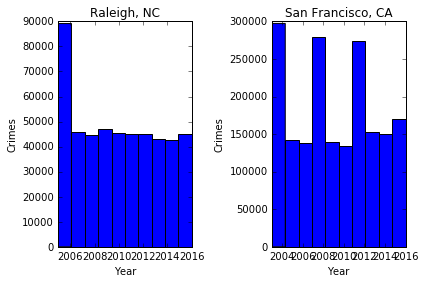

In [6]:
plt.figure(1)
plt.subplot(121)
a = pd.DatetimeIndex(raleigh['INC DATETIME'])
plt.hist(a.year)
plt.xlim(2005, 2016)
plt.title('Raleigh, NC')
plt.xlabel('Year')
plt.ylabel('Crimes')

plt.subplot(122)
a = pd.DatetimeIndex(sanfrancisco['Date'])
plt.hist(a.year)
plt.xlim(2003,2016)
plt.title('San Francisco, CA')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.tight_layout()
plt.show()

In [7]:
print('Interesting Statistics:')
print(round(len(map_raleigh_final[z]) / len(raleigh) * 100,3), '% of crime in Raleigh, NC is Vehicle Theft.')
print(round((len(map_raleigh_final) - len(map_raleigh_final[z])) / len(raleigh) * 100,3), '% of crime in Raleigh, NC is Homicide.')
print(round(len(map_sanfrancisco) / len(sanfrancisco) * 100,3), '% of crime in San Francisco, CA is Vehicle Theft.')

Interesting Statistics:
0.285 % of crime in Raleigh, NC is Vehicle Theft.
0.004 % of crime in Raleigh, NC is Homicide.
6.062 % of crime in San Francisco, CA is Vehicle Theft.


* Outliers for San Francisco's locations were removed from the data when graphed as they were likely typos.
* Similarly, non-entries for Raleigh's location were removed.
* San Francisco's data had Homicides omitted.

[United States Census Bureau](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=0ahUKEwjOlvG-hZzLAhUDFx4KHULfCbQQkh8IJSgA&url=http%3A%2F%2Fwww.census.gov%2Fpopest%2Fabout%2Fterms.html&usg=AFQjCNETbO3vQZlGnGHf1vGro68_J7Plrw&sig2=UmvSld2SgTVxVZzhniKoCg&bvm=bv.115339255,d.dmo) states that for the year 2013, San Francisco's population is approximately double that of Raleigh's (accessed on 02/28/2016). Therefore, San Francisco has more crime per capita and overall than Raleigh. Also, the severity of crimes in San Francisco is higher (such as Vehicle Theft) and occur all over the city.

Crime Locations:

* Raleigh's crime is more sparse, with the majority of more severe crimes in the Southeast portion of the city.
* San Francisco's crime is all over the city with a significant density in the Northeast portion of the city.

In conclusion, Raleigh is a safer city than San Francisco.

We could get a better picture of the comparison between the two cities if we had the statistics for Homicide in San Francisco and the population densities for both city. Another interesting statistic would be the income of the areas and those that commit the crimes to find correlations there as well.